<a href="https://www.kaggle.com/code/suyashkapil/simple-titanic-survival-prediction-model?scriptVersionId=113551892" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [21]:
# Importing libraries
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#importing the train dataset
titanic = pd.read_csv('../input/titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#dropping the columns which won't be of much help in predicting 
tt = titanic.drop(columns = ['Name','Ticket','Cabin','PassengerId'])
tt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
tt.info() #finding how many null values are there in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
#For applying the model, changing strings into integers using pandas.factorize() function
tt2 = pd.factorize(tt['Sex'])[0]
tt3 = pd.factorize(tt['Embarked'])[0]
tt['Sex'] = tt2
tt['Embarked'] = tt3
tt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,NaN,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [8]:
#Filling the null values by the overall mean of the column
# This can also be done using imputer
tt['Age'] = tt['Age'].fillna(np.mean(tt['Age']))
tt['Embarked']=tt['Embarked'].fillna(np.mean(tt['Embarked']))
tt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]
   Survived
0       549
1       342


<BarContainer object of 2 artists>

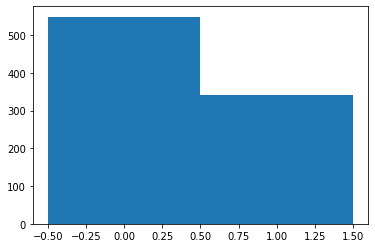

In [72]:
yp = tt['Survived']
xp = tt['Sex']
df = pd.DataFrame(yp,index = np.arange(0,len(yp),1))
print(df)
t = df.groupby(yp)
f = t.count()
df2 = pd.DataFrame(f,index = [0,1])
print(df2)
plt.bar([0,1],f['Survived'],width=1)

In [9]:
tt.info() #checking if null values remain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [10]:
#dividing the dataset into x_train and y_train to train the model
x_train = tt.drop(columns = ['Survived'])
print(x_train)
y_train = tt['Survived']
print(y_train)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [11]:
#importing the test dataset
test = pd.read_csv('../input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
#cleaning the test dataset in the same way as the train dataset
test1 = test.drop(columns = ['PassengerId','Name','Ticket','Cabin'])
test1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [12]:
test1['Age'] = test1['Age'].fillna(np.mean(test1['Age']))
test1['Fare'] = test1['Fare'].fillna(np.mean(test1['Fare']))
test1['Sex'] = pd.factorize(test1['Sex'])[0]
test1['Embarked'] = pd.factorize(test1['Embarked'])[0]
test1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,0
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,0
3,3,0,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,1
416,3,0,30.27259,0,0,8.0500,1


In [13]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [12]:
#choosing the model to predict the values
model = mlp(activation = 'tanh',max_iter = 1000)
model.fit(x_train,y_train)
pred = model.predict(test1)
pred

NameError: name 'test1' is not defined

In [15]:
# Making Cross Validation dataset by dividing train dataset in ratio 60:40
x_cvtrain,x_cvtest,y_cvtrain,y_cvtest=  train_test_split(x_train,y_train,test_size =0.4)

print(x_cvtrain)
print(x_cvtest)
print(y_cvtrain)
print(y_cvtest)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
762       3    0  20.000000      0      0   7.2292         1
349       3    0  42.000000      0      0   8.6625         0
413       2    0  29.699118      0      0   0.0000         0
774       2    1  54.000000      1      3  23.0000         0
515       1    0  47.000000      0      0  34.0208         0
..      ...  ...        ...    ...    ...      ...       ...
474       3    1  22.000000      0      0   9.8375         0
430       1    0  28.000000      0      0  26.5500         0
632       1    0  32.000000      0      0  30.5000         1
43        2    1   3.000000      1      2  41.5792         1
623       3    0  21.000000      0      0   7.8542         0

[534 rows x 7 columns]
     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
586       2    0  47.000000      0      0  15.0000         0
250       3    0  29.699118      0      0   7.2500         0
793       1    0  29.699118      0      0  30.6958         1


In [16]:
cross = model.predict(x_cvtest)
cross

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

In [17]:
# Checking the accuracy score
score = accuracy_score(y_cvtest,cross)
print(score*100)

82.35294117647058


In [18]:
#score using SVM was 66.94 on first run
#score using logistic regression was 81.51 on first run
#score using MLP Classifier default(relu) was 83.19 on first run
#score using MLP Classifier logistic activtator is 80.62 on first run
#score using MLP Classifier relu activator is 79.55 on first run
#score using MLP Classifier tanh activator is 84.3 on first run
#score using MLP Classifier tanh activator is 84.6 on first run using 1000 max iterations(default is 200)
#score using MLP Classifier tanh activator is 87.4 on second run using 1000 max iterations
#score using MLP Classifier tanh,1000 max_iter and 0.01 alpha is 85.15 (default alpha is 0.0001)
#score using MLP Classifier tanh,1000 max_iter and 0.001 alpha is 83.2
#score using MLP Classifier tanh,1000 max_iter and 0.1 alpha is 84.1